In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# to ploting a QQ plot
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [39]:
df = pd.read_csv('titanic_toy.csv', usecols=['Age', 'Fare','Survived'])

In [40]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [41]:
df.isnull().sum()

Age         177
Fare         45
Survived      0
dtype: int64

In [42]:
df.fillna(df['Age'].mean(), inplace=True)

In [43]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [44]:
df.shape

(891, 3)

In [46]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\susha\AppData\Local\Temp\ipykernel_9576\3525243994.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


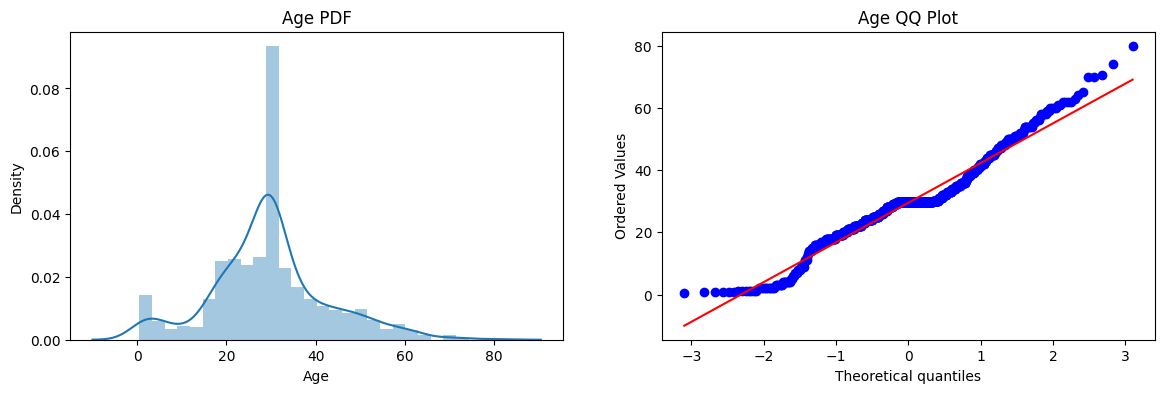

In [56]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\susha\AppData\Local\Temp\ipykernel_9576\3503948376.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


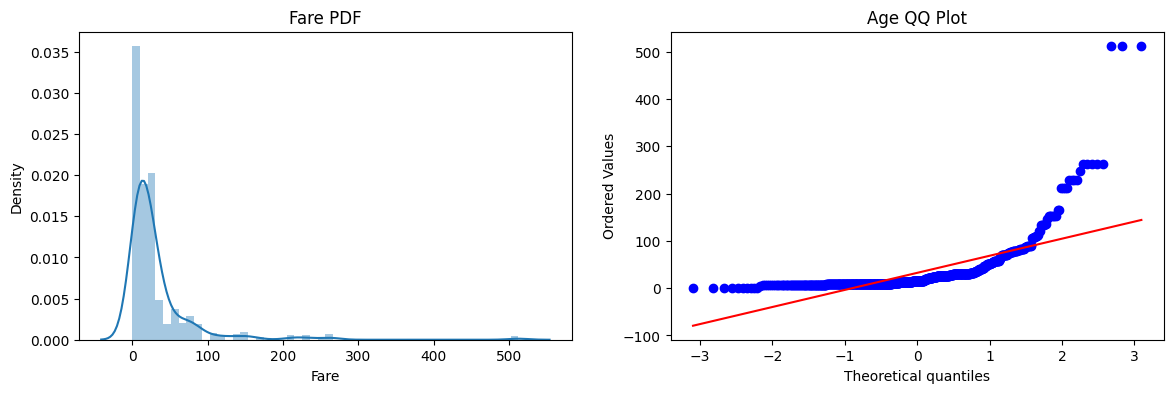

In [57]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [58]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [59]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print('Accuracy LR : ', accuracy_score(y_test, y_pred1))
print('Accuracy DT : ', accuracy_score(y_test, y_pred2))

Accuracy LR :  0.6480446927374302
Accuracy DT :  0.6927374301675978


In [60]:
trf = FunctionTransformer(func=np.log1p)

In [61]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [65]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy LR : ", accuracy_score(y_test, y_pred1))
print("Accuracy DT : ", accuracy_score(y_test, y_pred2))

Accuracy LR :  0.6927374301675978
Accuracy DT :  0.6759776536312849


In [66]:
# cross validate for accuracy checking

X_transformed = trf.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR : ", np.mean(cross_val_score(clf1, X_transformed, y , scoring='accuracy', cv=10)))
print("DT : ", np.mean(cross_val_score(clf2, X_transformed, y , scoring='accuracy', cv=10)))

LR :  0.6802746566791511
DT :  0.6375530586766541


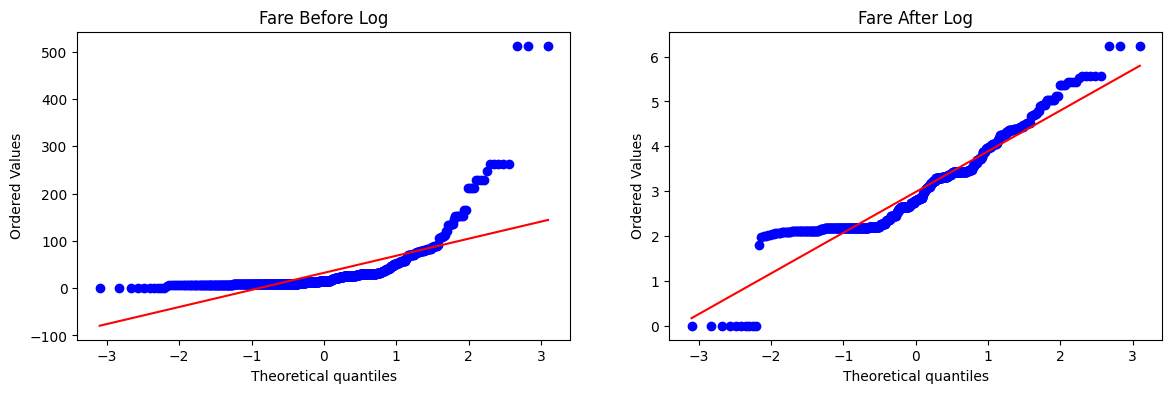

In [68]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log')
plt.show()

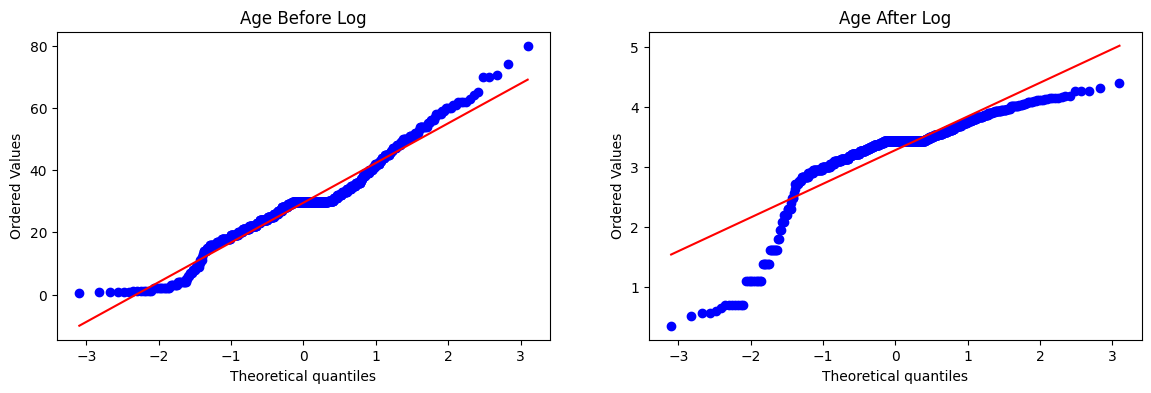

In [69]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log')
plt.show()

In [72]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [73]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1 = clf1.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR : ", accuracy_score(y_test, y_pred1))
print("Accuracy DT : ", accuracy_score(y_test, y_pred2))

Accuracy LR :  0.6815642458100558
Accuracy DT :  0.6815642458100558


In [74]:
# cross validate for accuracy checking

X_transformed2 = trf.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR : ", np.mean(cross_val_score(clf1, X_transformed2, y , scoring='accuracy', cv=10)))
print("DT : ", np.mean(cross_val_score(clf2, X_transformed2, y , scoring='accuracy', cv=10)))

LR :  0.6802746566791511
DT :  0.6375280898876404
